# Dataset

## Upload

In [82]:
# !rm -f katlas_datasets.zip && zip -r katlas_datasets.zip . -x "_*" ".*" "**/_*" "**/.*"

** indicates further steps but not the top level

save the zip to https://drive.google.com/drive/folders/1j-AooWe48Ie10I9Uy2Mlf2NueBUNiD4Y

Or put the below into terminal for automation (configure rclone first)

```bash
rm -f katlas_datasets.zip \
&& zip -r katlas_datasets.zip . -x "_*" ".*" "**/_*" "**/.*" \
&& rclone copy katlas_datasets.zip gdrive:katlas_dataset --progress
```

In [15]:
from pathlib import Path
import subprocess

def upload_katlas_dataset(
    zip_name: str = "katlas_datasets.zip",
    folder_id: str = "katlas_dataset",
    shell: str = "bash",   # or "zsh"
    verbose: bool = True,
):
    """
    Zip current directory (excluding junk) and upload to Google Drive via rclone.

    Equivalent to:
      rm -f katlas_datasets.zip &&
      zip -r katlas_datasets.zip . -x "_*" ".*" "**/_*" "**/.*" &&
      rclone copy katlas_datasets.zip gdrive:FOLDER_ID --progress
    """

    zip_path = Path(zip_name)

    # --- remove old zip ---
    if zip_path.exists():
        zip_path.unlink()

    # --- zip ---
    zip_cmd = (
        f'zip -r "{zip_name}" . '
        f'-x "_*" ".*" "**/_*" "**/.*"'
    )
    subprocess.run([shell, "-lc", zip_cmd], check=True)

    print('saving to drive folder:', folder_id)
    # --- upload ---
    rclone_cmd = (
        f'rclone copy "{zip_name}" '
        f'gdrive:{folder_id} '
        f'{"--progress" if verbose else ""}'
    )
    subprocess.run([shell, "-lc", rclone_cmd], check=True)

    return zip_path

In [19]:
upload_katlas_dataset()

  adding: PSPA/ (stored 0%)
  adding: PSPA/pspa_pct_st.parquet (deflated 5%)
  adding: PSPA/pspa_divide_num.csv (deflated 90%)
  adding: PSPA/pspa_all_scale.parquet (deflated 61%)
  adding: PSPA/pspa_all_raw.parquet (deflated 38%)
  adding: PSPA/pspa_all_norm.parquet (deflated 60%)
  adding: PSPA/pspa_tyr_norm.parquet (deflated 76%)
  adding: PSPA/pspa_pct_tyr.parquet (deflated 6%)
  adding: PSPA/pspa_st_norm.parquet (deflated 64%)
  adding: kinase_info.parquet (deflated 33%)
  adding: uniprot_human_keyword_kinase.parquet (deflated 36%)
  adding: reactome_all_levels.parquet (deflated 23%)
  adding: amino_acids/ (stored 0%)
  adding: amino_acids/aa_info.parquet (deflated 64%)
  adding: amino_acids/aa_rdkit.parquet (deflated 77%)
  adding: amino_acids/aa_morgan.parquet (deflated 90%)
  adding: reactome_lowest_level.parquet (deflated 23%)
  adding: kinase_info.csv (deflated 60%)
  adding: CDDM/ (stored 0%)
  adding: CDDM/ks_datasets_20250407.parquet (deflated 45%)
  adding: CDDM/pssms_upp

Path('katlas_datasets.zip')

## Validate

In [8]:
from katlas.data import *

In [20]:
Data.download(force=True)

♻️ Removing existing folder: /var/folders/56/904g0kln5sg2lctzv82mp2r80000gq/T/katlas_dataset
⬇️ Downloading katlas_dataset.zip ...


Downloading...
From (original): https://drive.google.com/uc?id=17wIl0DbdoHV036Z3xgaT_0H3LlM_W47l
From (redirected): https://drive.google.com/uc?id=17wIl0DbdoHV036Z3xgaT_0H3LlM_W47l&confirm=t&uuid=d113cc28-a8ae-4524-894d-217ad8b453b4
To: /var/folders/56/904g0kln5sg2lctzv82mp2r80000gq/T/katlas_dataset.zip
100%|██████████| 211M/211M [00:05<00:00, 38.4MB/s] 


📂 Extracting to /var/folders/56/904g0kln5sg2lctzv82mp2r80000gq/T/katlas_dataset ...
🧹 Removing zip file: /var/folders/56/904g0kln5sg2lctzv82mp2r80000gq/T/katlas_dataset.zip
✅ Done! Extracted dataset is at: /var/folders/56/904g0kln5sg2lctzv82mp2r80000gq/T/katlas_dataset


In [22]:
!ls /var/folders/56/904g0kln5sg2lctzv82mp2r80000gq/T/katlas_dataset/PSPA

pspa_all_norm.parquet  pspa_divide_num.csv    pspa_st_norm.parquet
pspa_all_raw.parquet   pspa_pct_st.parquet    pspa_tyr_norm.parquet
pspa_all_scale.parquet pspa_pct_tyr.parquet


## Change data source

In [2]:
import pandas as pd 

In [4]:
df=pd.read_csv('PSPA/pspa_raw.csv')

In [8]:
df2 = pd.read_parquet('PSPA/paper_raw.parquet')

In [ ]:
st=pd.read_csv('PSPA/pspa_st_raw.csv').set_index('kinase')

In [11]:
tyr=pd.read_csv('PSPA/pspa_tyr_raw.csv')

In [16]:
df = pd.concat([st,tyr])

In [19]:
df = df.set_index('kinase')

In [20]:
from katlas.data import *

In [22]:
pspa=Data.get_pspa()

In [38]:
name_map = {
 'ABL': 'ABL1',
 'ACK': 'TNK2',
 'ARG': 'ABL2',
 'BRK': 'PTK6',
 'CSFR': 'CSF1R',
 'CTK': 'MATK',
 'ETK': 'BMX',
 'FAK': 'PTK2',
 'HER2': 'ERBB2',
 'HER4': 'ERBB4',
 'IRR': 'INSRR',
 'MER': 'MERTK',
 'MKK4_TYR': 'MAP2K4_TYR',
 'MKK6_TYR': 'MAP2K6_TYR',
 'MKK7_TYR': 'MAP2K7_TYR',
 'MYT1_TYR': 'PKMYT1_TYR',
 'PYK2': 'PTK2B',
 'ROS': 'ROS1',
 'TIE2': 'TEK',
 'TRKA': 'NTRK1',
 'TRKB': 'NTRK2',
 'TRKC': 'NTRK3',
 'VEGFR1': 'FLT1',
 'VEGFR2': 'KDR',
 'VEGFR3': 'FLT4',
 'YES': 'YES1'}

In [47]:
new_idx = df.index.to_series().replace(name_map).values

In [48]:
df.index=new_idx

In [52]:
df.index.isin(pspa.index).sum()

np.int64(396)

In [53]:
df.index.duplicated().sum()

np.int64(0)

In [78]:
df4 = df.loc[:,~df.columns.str.contains('s')].copy()

In [79]:
df4

,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,-5L,-5M,...,5W,5H,5K,5R,5Q,5N,5D,5E,5t,5y
AAK1,7.614134e+06,2.590563e+06,3.001315e+06,4.696631e+06,4.944312e+06,8.315838e+06,1.005654e+07,1.643306e+07,1.049974e+07,9.133578e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACVR2A,4.991039e+06,5.783856e+06,7.015771e+06,8.367603e+06,7.072052e+06,7.601400e+06,7.188292e+06,7.513916e+06,7.159895e+06,6.266123e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACVR2B,2.648033e+07,2.568969e+07,2.813730e+07,4.517591e+07,3.287672e+07,3.351696e+07,2.701119e+07,2.199626e+07,2.341299e+07,2.567058e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AKT1,1.839951e+07,1.810468e+07,1.683184e+07,1.724774e+07,2.264728e+07,1.780129e+07,1.303757e+07,1.327190e+07,1.415649e+07,1.540976e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AKT2,5.439238e+06,5.569477e+06,5.805463e+06,6.301076e+06,5.004932e+06,4.812023e+06,3.906822e+06,3.776845e+06,4.450345e+06,4.629320e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KDR,1.845994e+08,1.957994e+08,1.620357e+08,1.425970e+08,1.574334e+08,1.531566e+08,1.242434e+08,1.222766e+08,1.247404e+08,1.387319e+08,...,1.882077e+08,2.110087e+08,2.534600e+08,2.993315e+08,1.976187e+08,2.261265e+08,1.608296e+08,1.501505e+08,1.299218e+08,1.576529e+08
FLT4,9.527287e+07,1.108087e+08,1.018308e+08,1.047181e+08,1.068304e+08,9.834637e+07,9.014825e+07,1.040920e+08,9.891781e+07,1.105403e+08,...,1.699012e+08,1.485416e+08,1.343001e+08,1.332253e+08,1.279277e+08,1.453889e+08,1.476054e+08,1.256585e+08,1.429869e+08,1.104032e+08
WEE1_TYR,4.876443e+06,5.871573e+06,5.126751e+06,4.908054e+06,3.972485e+06,3.994803e+06,5.210680e+06,5.241236e+06,5.842673e+06,5.156345e+06,...,6.765854e+06,8.778525e+06,1.587544e+07,2.487483e+07,6.699295e+06,7.418493e+06,4.682664e+06,5.478585e+06,6.788179e+06,7.347954e+06
YES1,4.388800e+07,3.701994e+07,3.481183e+07,3.092071e+07,3.417660e+07,3.269791e+07,2.818378e+07,2.430711e+07,2.589843e+07,3.001820e+07,...,2.986006e+07,3.878461e+07,4.333210e+07,5.493890e+07,3.655036e+07,3.954854e+07,2.763053e+07,3.151895e+07,2.450141e+07,2.687413e+07


In [55]:
df.to_parquet('PSPA/pspa_all_raw.parquet')

In [64]:
df=pd.read_parquet('PSPA/pspa_all_raw.parquet')

In [70]:
from katlas.pssm.core import *
from katlas.pssm.plot import *

In [ ]:
recover_pssm(df2.loc['ABL1'])

<Axes: >

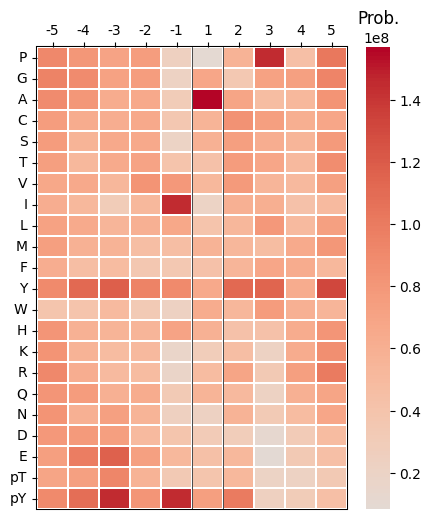

In [80]:
plot_heatmap(recover_pssm(df4.loc['ABL1']))

In [65]:
df

,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,-5L,-5M,...,5H,5K,5R,5Q,5N,5D,5E,5s,5t,5y
AAK1,7.614134e+06,2.590563e+06,3.001315e+06,4.696631e+06,4.944312e+06,8.315838e+06,1.005654e+07,1.643306e+07,1.049974e+07,9.133578e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACVR2A,4.991039e+06,5.783856e+06,7.015771e+06,8.367603e+06,7.072052e+06,7.601400e+06,7.188292e+06,7.513916e+06,7.159895e+06,6.266123e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACVR2B,2.648033e+07,2.568969e+07,2.813730e+07,4.517591e+07,3.287672e+07,3.351696e+07,2.701119e+07,2.199626e+07,2.341299e+07,2.567058e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AKT1,1.839951e+07,1.810468e+07,1.683184e+07,1.724774e+07,2.264728e+07,1.780129e+07,1.303757e+07,1.327190e+07,1.415649e+07,1.540976e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AKT2,5.439238e+06,5.569477e+06,5.805463e+06,6.301076e+06,5.004932e+06,4.812023e+06,3.906822e+06,3.776845e+06,4.450345e+06,4.629320e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KDR,1.845994e+08,1.957994e+08,1.620357e+08,1.425970e+08,1.574334e+08,1.531566e+08,1.242434e+08,1.222766e+08,1.247404e+08,1.387319e+08,...,2.110087e+08,2.534600e+08,2.993315e+08,1.976187e+08,2.261265e+08,1.608296e+08,1.501505e+08,1.299218e+08,1.299218e+08,1.576529e+08
FLT4,9.527287e+07,1.108087e+08,1.018308e+08,1.047181e+08,1.068304e+08,9.834637e+07,9.014825e+07,1.040920e+08,9.891781e+07,1.105403e+08,...,1.485416e+08,1.343001e+08,1.332253e+08,1.279277e+08,1.453889e+08,1.476054e+08,1.256585e+08,1.429869e+08,1.429869e+08,1.104032e+08
WEE1_TYR,4.876443e+06,5.871573e+06,5.126751e+06,4.908054e+06,3.972485e+06,3.994803e+06,5.210680e+06,5.241236e+06,5.842673e+06,5.156345e+06,...,8.778525e+06,1.587544e+07,2.487483e+07,6.699295e+06,7.418493e+06,4.682664e+06,5.478585e+06,6.788179e+06,6.788179e+06,7.347954e+06
YES1,4.388800e+07,3.701994e+07,3.481183e+07,3.092071e+07,3.417660e+07,3.269791e+07,2.818378e+07,2.430711e+07,2.589843e+07,3.001820e+07,...,3.878461e+07,4.333210e+07,5.493890e+07,3.655036e+07,3.954854e+07,2.763053e+07,3.151895e+07,2.450141e+07,2.450141e+07,2.687413e+07


In [56]:
df2 = pd.read_parquet('PSPA/pspa_all_norm.parquet')

In [58]:
df2.index.isin(pspa.index).sum()

np.int64(396)

In [ ]:
df3 = pd.read_parquet('PSPA/pspa_all_scale.parquet') # scale does not have +5 positions

In [63]:
df3.index.isin(pspa.index).sum()

np.int64(396)

In [ ]:
df

In [32]:
a=pspa[~pspa.index.isin(df.index)].index

In [28]:
df.to_csv('pspa_raw_full.csv')

In [33]:
b=df[~df.index.isin(pspa.index)].index

In [37]:
dict(zip(b,a))

{'ABL': 'ABL1',
 'ACK': 'TNK2',
 'ARG': 'ABL2',
 'BRK': 'PTK6',
 'CSFR': 'CSF1R',
 'CTK': 'MATK',
 'ETK': 'BMX',
 'FAK': 'PTK2',
 'HER2': 'ERBB2',
 'HER4': 'ERBB4',
 'IRR': 'INSRR',
 'MER': 'MERTK',
 'MKK4_TYR': 'MAP2K4_TYR',
 'MKK6_TYR': 'MAP2K6_TYR',
 'MKK7_TYR': 'MAP2K7_TYR',
 'MYT1_TYR': 'PKMYT1_TYR',
 'PYK2': 'PTK2B',
 'ROS': 'ROS1',
 'TIE2': 'TEK',
 'TRKA': 'NTRK1',
 'TRKB': 'NTRK2',
 'TRKC': 'NTRK3',
 'VEGFR1': 'FLT1',
 'VEGFR2': 'KDR',
 'VEGFR3': 'FLT4',
 'YES': 'YES1'}

In [2]:
from katlas.pssm import *

In [10]:
def change_colname(fname):
    df=pd.read_parquet(fname)
    df.columns = df.columns.map(pSTY2sty)
    df.to_parquet(fname)
    print(fname,'changed')

In [11]:
from pathlib import Path

In [20]:
files = [f for f in Path('CDDM').rglob('pssms*')]

In [29]:
 files = files+[Path('PSPA/pspa_all_norm.parquet'),
  Path('PSPA/pspa_tyr_norm.parquet'),
  Path('PSPA/pspa_st_norm.parquet'),
  Path('PSPA/pspa_all_scale.parquet'),
 ]

In [30]:
files

[Path('CDDM/pssms.parquet'),
 Path('CDDM/pssms_LO_upper.parquet'),
 Path('CDDM/pssms_upper.parquet'),
 Path('CDDM/pssms_LO.parquet'),
 Path('PSPA/pspa_all_norm.parquet'),
 Path('PSPA/pspa_tyr_norm.parquet'),
 Path('PSPA/pspa_st_norm.parquet'),
 Path('PSPA/pspa_all_scale.parquet')]

In [31]:
for f in files: change_colname(f)

CDDM/pssms.parquet changed
CDDM/pssms_LO_upper.parquet changed
CDDM/pssms_upper.parquet changed
CDDM/pssms_LO.parquet changed
PSPA/pspa_all_norm.parquet changed
PSPA/pspa_tyr_norm.parquet changed
PSPA/pspa_st_norm.parquet changed
PSPA/pspa_all_scale.parquet changed


In [32]:
pd.read_parquet(files[-1])

,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,-5L,-5M,...,4H,4K,4R,4Q,4N,4D,4E,4s,4t,4y
kinase,,,,,,,,,,,,,,,,,,,,,
AAK1,0.05845,0.01989,0.02305,0.03702,0.03450,0.03450,0.07720,0.12615,0.08061,0.07014,...,0.04482,0.06651,0.07427,0.05082,0.04738,0.03113,0.03657,0.02009,0.02009,0.02161
ACVR2A,0.02971,0.03443,0.04180,0.03500,0.04137,0.04137,0.04281,0.04474,0.04266,0.03729,...,0.04202,0.03865,0.03601,0.04517,0.04077,0.04693,0.04693,0.05155,0.05155,0.04319
ACVR2B,0.03779,0.03665,0.04013,0.05473,0.03779,0.03779,0.03850,0.03134,0.03339,0.03658,...,0.04056,0.03261,0.03514,0.04229,0.03846,0.05278,0.05039,0.05502,0.05502,0.04605
AKT1,0.04669,0.04599,0.04274,0.04684,0.03995,0.03995,0.03306,0.03368,0.03592,0.03910,...,0.05299,0.09151,0.08648,0.05874,0.05187,0.03541,0.02494,0.03141,0.03141,0.02102
AKT2,0.04617,0.04732,0.04931,0.04464,0.04095,0.04095,0.03321,0.03206,0.03781,0.03934,...,0.05199,0.08844,0.07580,0.04992,0.04770,0.02772,0.02680,0.04196,0.04196,0.03193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KDR,0.04816,0.05105,0.04224,0.03927,0.04110,0.03996,0.03244,0.03191,0.03251,0.03616,...,0.04386,0.07036,0.07377,0.04718,0.03979,0.03074,0.02808,0.02492,0.02492,0.02426
FLT4,0.03554,0.04129,0.03795,0.04300,0.03982,0.03663,0.03360,0.03881,0.03686,0.04122,...,0.05899,0.05158,0.06051,0.04823,0.03842,0.04042,0.03962,0.03548,0.03548,0.03986
WEE1_TYR,0.04065,0.04899,0.04279,0.04287,0.03314,0.03330,0.04348,0.04371,0.04876,0.04302,...,0.04213,0.09097,0.10234,0.04450,0.03460,0.02749,0.03166,0.03051,0.03051,0.03788


In [8]:
%%time
df = pd.read_parquet('CDDM/ks_datasets_20250407.parquet')

CPU times: user 199 ms, sys: 295 ms, total: 494 ms
Wall time: 1.49 s


In [9]:
cols = ['kinase_uniprot','substrate_uniprot','site','source','substrate_genes','site_seq']

In [10]:
df = df[cols]

In [12]:
df

,kinase_uniprot,substrate_uniprot,site,source,substrate_genes,site_seq
0,O00141,A4FU28,S140,Sugiyama,CTAGE9,AAAEEARSLEATCEKLSRsNsELEDEILCLEKDLKEEKSKH
1,O00141,O00141,S252,Sugiyama,SGK1 SGK,SQGHIVLTDFGLCKENIEHNsTtstFCGtPEyLAPEVLHKQ
2,O00141,O00141,S255,Sugiyama,SGK1 SGK,HIVLTDFGLCKENIEHNsTtstFCGtPEyLAPEVLHKQPYD
3,O00141,O00141,S397,Sugiyama,SGK1 SGK,sGPNDLRHFDPEFTEEPVPNsIGKsPDsVLVTAsVKEAAEA
4,O00141,O00141,S404,Sugiyama,SGK1 SGK,HFDPEFTEEPVPNsIGKsPDsVLVTAsVKEAAEAFLGFsYA
...,...,...,...,...,...,...
187061,Q9Y6R4,P62273,Y7,Sugiyama,RPS29,______________MGHQQLyWsHPRKFGQGSRSCRVCSNR
187062,Q9Y6R4,Q86W56,Y832,Sugiyama,PARG,DDWQRRCTEIVAIDALHFRRyLDQFVPEKMRRELNKAYCGF
187063,Q9Y6R4,Q9Y6R4,T1324,Sugiyama,MAP3K4 KIAA0213 MAPKKK4 MEKK4 MTK1,FEEKRYREMRRKNIIGQVCDtPKSyDNVMHVGLRKVTFKWQ
187064,Q9Y6R4,Q9Y6R4,T1494,SIGNOR|EPSD|PSP,MAP3K4 KIAA0213 MAPKKK4 MEKK4 MTK1,SGLIKLGDFGCSVKLKNNAQtMPGEVNSTLGTAAYMAPEVI


In [11]:
df.to_parquet('CDDM/ks_datasets_20250407_web.parquet')

In [2]:
df = pd.read_csv('kinase_info.csv')

In [7]:
df.uniprot.to_csv('uniprot.csv')

In [14]:
df.in_pspa = (df.in_pspa_st |df.in_pspa_tyr).astype(int)

In [16]:
df.in_pspa.value_counts()

in_pspa
1    392
0    131
Name: count, dtype: int64

In [4]:
df.columns

Index(['kinase', 'ID_coral', 'uniprot', 'ID_HGNC', 'modi_group', 'group',
       'family', 'subfamily_coral', 'subfamily', 'in_pspa_st', 'in_pspa_tyr',
       'in_pspa', 'in_cddm', 'kd_ID', 'active_D1_D2', 'active_kd_ID',
       'pspa_ID', 'pseudo', 'pspa_category_small', 'pspa_category_big',
       'cddm_big', 'cddm_small', 'length', 'human_uniprot_sequence',
       'kinasecom_domain', 'nucleus', 'cytosol', 'cytoskeleton',
       'plasma membrane', 'mitochondrion', 'Golgi apparatus',
       'endoplasmic reticulum', 'vesicle', 'centrosome', 'aggresome',
       'main_location'],
      dtype='object')

In [6]:
df.pspa_category_small = df.pspa_category_small.str.capitalize()

In [7]:
df.pspa_category_big = df.pspa_category_big.str.capitalize()

In [17]:
df.to_csv('kinase_info2.csv',index=False)

In [3]:
df = pd.read_excel('uniprot_kd_labeled.xlsx')

In [5]:
df.to_parquet('uniprot_kd_labeled.parquet')

In [6]:
df = pd.read_parquet('uniprot_kd_labeled.parquet')

In [8]:
df.active_D1_D2.value_counts()

active_D1_D2
1    4209
0    1327
Name: count, dtype: int64

## Update sequence

In [5]:
df=Data.get_kinase_info()

In [6]:
df.human_uniprot_sequence.str.len().sort_values()

392      253
493      268
448      273
390      277
81       292
       ...  
490     3859
124     4128
325     7968
326     7968
498    32756
Name: human_uniprot_sequence, Length: 523, dtype: int64

In [7]:
from tqdm.contrib.concurrent import thread_map

In [9]:
# get sequence through multiple thread as it's query from web
seq = thread_map(get_uniprot_seq, df['uniprot'])

  0%|          | 0/523 [00:00<?, ?it/s]

In [13]:
df.human_uniprot_sequence = seq

In [14]:
df.length = df.human_uniprot_sequence.str.len()

In [19]:
# df.to_csv('../../dataset/kinase_info.csv',index=False)